<a href="https://colab.research.google.com/github/yohanesnuwara/pyreservoir/blob/master/notebooks/well_drawdown_testing_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 750 (delta 45), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (750/750), 23.83 MiB | 15.82 MiB/s, done.
Resolving deltas: 100% (399/399), done.


In [3]:
import sys
sys.path.append('/content/pyreservoir/welltest')

from wellanalysis import *

In [4]:
# known 
poro = 0.15 # Porosity
rw = 0.333 # Wellbore radius, ft
h = 32 # Reservoir thickness, ft
ct = 12E-06 # Total compressibility, sip
pi = 2500 # Initial reservoir pressure, psia
mu_oil = 2 # Oil viscosity, cp
Bo = 1.333 # Oil FVF, RB/STB


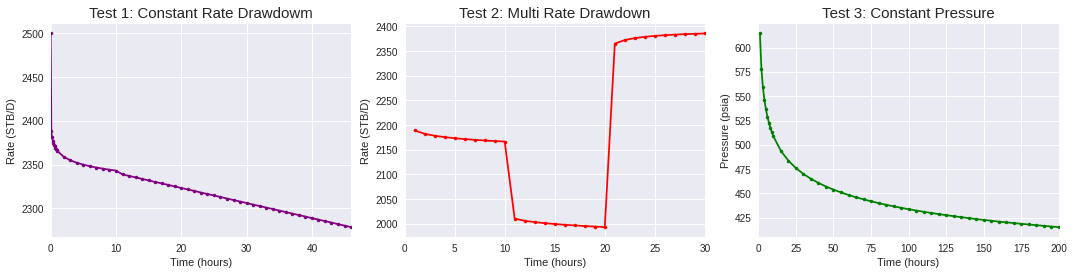

In [80]:
# There are 6 test datasets

import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("/content/pyreservoir/data/welltest", "*.csv")))

plt.figure(figsize=(15,7))
titles = ['Test 1: Constant Rate Drawdowm', 'Test 2: Multi Rate Drawdown',
          'Test 3: Constant Pressure']
colors = ['purple', 'red', 'green']

for i in range(len(paths)):
  if i < 3:
    if i == 2:
      # pressure test
      df = pd.read_csv(paths[i])
      t = df.iloc[:,0].values # time column
      q = df.iloc[:,1].values # rate column

      plt.subplot(2,3,i+1)
      plt.plot(t, q, '.-', color=colors[i])
      plt.ylabel('Pressure (psia)')

    else:
      # rate test
      df = pd.read_csv(paths[i])
      t = df.iloc[:,0].values # time column
      p = df.iloc[:,1].values # pressure column
      
      plt.subplot(2,3,i+1)
      plt.plot(t, p, '.-', color=colors[i])
      plt.ylabel('Rate (STB/D)')
    
    plt.title(titles[i], size=15)
    plt.xlabel('Time (hours)')
    plt.xlim(0, max(t))

plt.tight_layout(1)
plt.show()


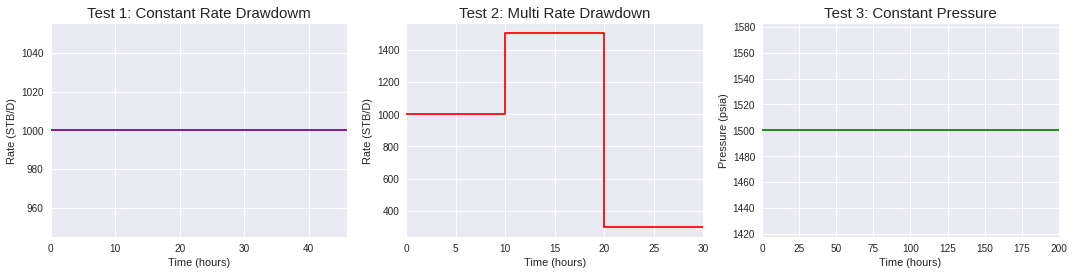

In [84]:
# test 1
t1 = [0, 46]
q1 = [1000, 1000]

# test 2
t2 = [0, 10, 20, 30]
q2 = [1000, 1000, 1500, 300]

# test 3
t3 = [0, 200]
p3 = [1500, 1500]

x = np.array([t1, t2, t3])
y = np.array([q1, q2, p3])

plt.figure(figsize=(15,7))
titles = ['Test 1: Constant Rate Drawdowm', 'Test 2: Multi Rate Drawdown',
          'Test 3: Constant Pressure']
colors = ['purple', 'red', 'green']

for i in range(len(x)):
  if i == 2:
    plt.subplot(2,3,i+1)
    plt.step(x[i], y[i], color=colors[i])
    plt.ylabel('Pressure (psia)')
  
  else:
    plt.subplot(2,3,i+1)
    plt.step(x[i], y[i], color=colors[i])
    plt.ylabel('Rate (STB/D)')

  plt.title(titles[i], size=15)
  plt.xlim(0, max(x[i]))
  plt.xlabel('Time (hours)')

plt.tight_layout(1)
plt.show()


## Constant Rate Drawdown Test

/content/pyreservoir/welltest/wellanalysis.py:94: RuntimeWarning: divide by zero encountered in log
  y_fit = m1 * np.log(t) + c1


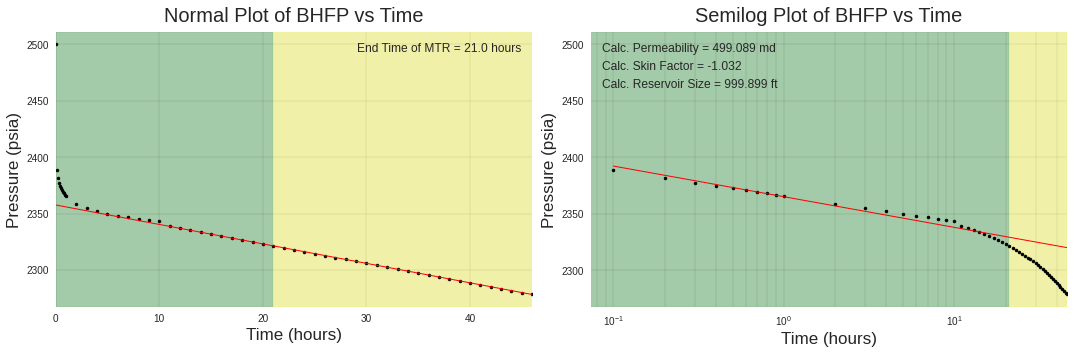

In [5]:
# load well-test data
df = pd.read_csv('/content/pyreservoir/data/welltest/welltest1_constant_rate_drawdown.csv')

t = df['t'].values
p = df['p'].values

# define rate
q = 1000 # Well rate, STB/D

# guess time index (input to user)
your_guess = 30

# well-test analysis
constant_rate_drawdown_test(t, p, q, Bo, mu_oil, h, poro, ct, rw, pi, your_guess)


## Multi Rate Drawdown Test

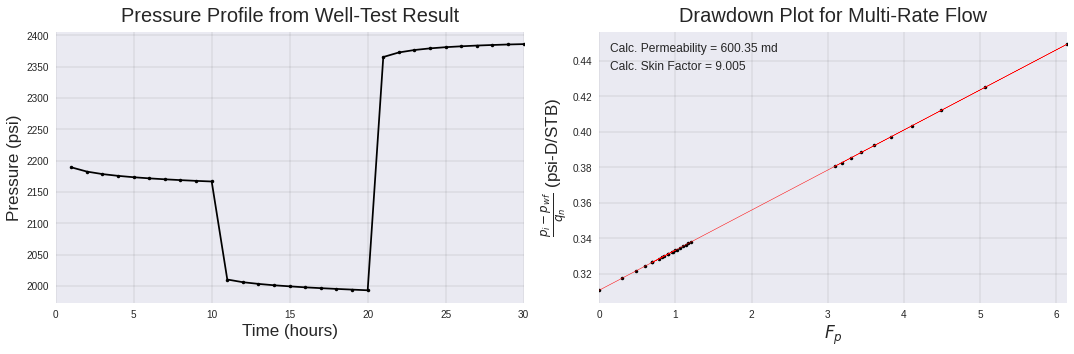

In [6]:
# load well-test data
df = pd.read_csv('/content/pyreservoir/data/welltest/welltest2_multi_rate_drawdown.csv')

t = df['t'].values
p = df['p'].values

# define rate-time steps
t_change = np.array([10, 20, 30])
q_change = np.array([1000, 1500, 300])

# well-test analysis
multi_rate_drawdown_test(t, p, t_change, q_change, Bo, mu_oil, h, poro, ct, rw, pi)


## Constant Pressure Test

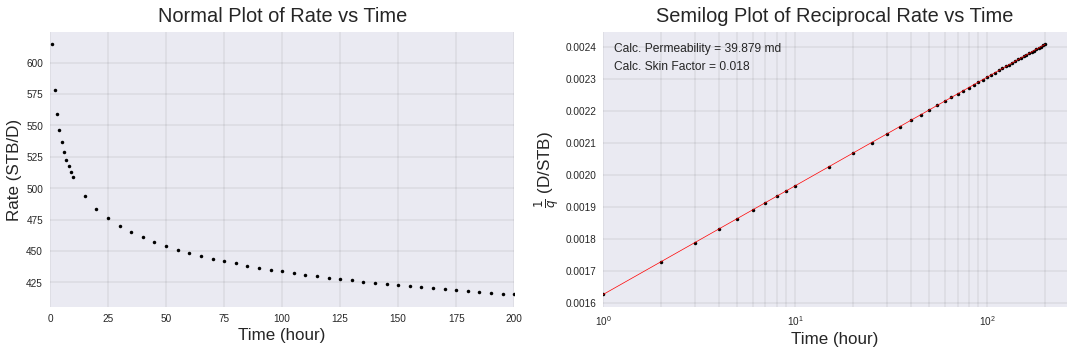

In [7]:
# load well-test data
df = pd.read_csv('/content/pyreservoir/data/welltest/welltest3_constant_pressure.csv')

t = df['t'].values
q = df['q'].values

# define flowing pressure
pwf = 1500 # Wellbore Flowing Pressure, psia

# well-test analysis
constant_pressure_test(t, q, pwf, pi, Bo, mu_oil, h, poro, ct, rw)